In [2]:
import numpy as np
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi

import matplotlib.pyplot as plt
import time

# Multivariate Normal

(-1.0971479008561498,
 2.3839899814360113,
 -1.1570568582622744,
 1.9269469998584297)

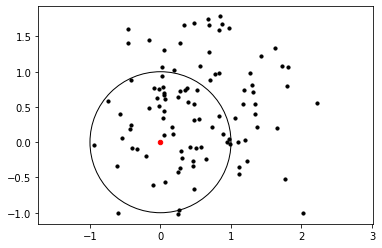

In [45]:
mean = np.array([0.5,0.5])
C = np.diag([0.5,0.5])

lam = 100
sample = np.random.multivariate_normal(mean, C, lam)

draw_circle = plt.Circle((0,0),1,fill=False)

plt.gcf().gca().add_artist(draw_circle)
for x,y in sample:
    plt.scatter(x,y, s=10, c='k')
plt.scatter(0,0, s=20, c='r')
plt.axis('equal')

# Objective Function

In [3]:
def objective(x, y):
    #return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20
    return x*x + y*y

# Vanila Evolutionary Strategy

In [53]:
mean = np.random.randn(2)
C = np.diag([1,1])

mu = 3
lam = 50
step_size = 1
iteration, best = 0, 100
max_iter = 5000

start = time.time()
for num in range(max_iter):
    z_sample = np.random.multivariate_normal([0,0], C, lam)
    z_sel = np.zeros(2)
    
    sample = mean + step_size * z_sample

    score = [objective(x,y) for x, y in sample]

    selected = [[j,score[j]] for i, j in enumerate(np.argsort(score)) if i<mu]

    for s in selected:
        if s[1]<best:
            best = s[1]
            print(f"#{num} f({sample[s[0]]}) = {s[1]}")
            print(f"{time.time() - start} s")
        z_sel = z_sel + (1/mu) * z_sample[s[0]]
    mean = mean + step_size * z_sel
        
print("DONE")

#0 f([-0.03217227 -0.41463811]) = 0.17295982154809808
0.0009586811065673828 s
#1 f([ 0.10211633 -0.23249571]) = 0.06448199902178914
0.0015246868133544922 s
#2 f([-0.01370888  0.10988916]) = 0.012263560310750895
0.002043008804321289 s
#8 f([-0.0399343   0.06730106]) = 0.006124180907557995
0.0031883716583251953 s
#19 f([-0.06754537 -0.02336631]) = 0.005108361523801873
0.005053281784057617 s
#22 f([-0.00685399 -0.06199404]) = 0.0038902384501927853
0.005766153335571289 s
#37 f([-0.06005562  0.01393157]) = 0.003800766305527333
0.008209466934204102 s
#48 f([-0.00836137  0.04422027]) = 0.00202534478937031
0.010073661804199219 s
#107 f([-0.0111595  0.0362969]) = 0.0014419990491312353
0.01904892921447754 s
#117 f([-0.00771831 -0.01943184]) = 0.0004371688995843279
0.020898103713989258 s
#271 f([-0.00138027 -0.0139436 ]) = 0.00019632924983398797
0.043703317642211914 s
#317 f([ 0.00387176 -0.00804946]) = 7.978436101578299e-05
0.05080461502075195 s
#570 f([-0.00065605 -0.00766258]) = 5.914545233696

# Rank-One Update

In [59]:
mean = np.random.randn(2)
#mean = np.array([0,0])
C = np.diag([1,1])

mu = 3
lam = 50
step_size = 1
iteration, best = 0, 100
max_iter = 5000

n = 2
c_cov = 2/(n**2)

w = [1/mu for _ in range(mu)]
mu_eff = 1/sum([x*x for x in w])

start = time.time()
for num in range(max_iter):
    z_sample = np.random.multivariate_normal([0,0], C, lam)
    z_sel = np.zeros(2)
    
    sample = mean + step_size * z_sample
    
    score = [objective(x,y) for x, y in sample]

    selected = [[j,score[j]] for i, j in enumerate(np.argsort(score)) if i<mu]

    for s in selected:
        if s[1]<best:
            best = s[1]
            print(f"#{num} f({sample[s[0]]}) = {s[1]}")
            print(f"{time.time() - start} s")
        z_sel = z_sel + (1/mu) * z_sample[s[0]]
    mean = mean + step_size * z_sel
    
    # C = 0.8 * C + 0.2 * z_sel.reshape(2,1) * z_sel.reshape(1,2)
    C = (1 - c_cov) * C + c_cov * (1 / mu_eff) * z_sel.reshape(2,1) * z_sel.reshape(1,2)

print("DONE")

#0 f([1.31777836 0.2032546 ]) = 1.7778522444603129
0.0011332035064697266 s
#2 f([-0.54997842  0.37023578]) = 0.4395507966208682
0.002086639404296875 s
#3 f([0.47930523 0.10660039]) = 0.24109715199841483
0.0027375221252441406 s
#5 f([0.12533481 0.09297971]) = 0.02435404062959784
0.0035495758056640625 s
#6 f([-0.05674378 -0.0862608 ]) = 0.010660782458981336
0.004090547561645508 s
#9 f([-0.04779094  0.04254796]) = 0.004094302604939079
0.0051496028900146484 s
#10 f([-0.01104202 -0.05959492]) = 0.003673480454954918
0.005736589431762695 s
#11 f([ 0.01782067 -0.0260424 ]) = 0.0009957827041371832
0.006340742111206055 s
#13 f([-0.01519253 -0.00628678]) = 0.0002703367597639662
0.007222652435302734 s
#14 f([ 0.00380073 -0.00443558]) = 3.4119928322286714e-05
0.007773876190185547 s
#15 f([ 0.00171    -0.00193107]) = 6.653108895092036e-06
0.008567333221435547 s
#17 f([ 0.00226749 -0.00032655]) = 5.248164440264698e-06
0.009436368942260742 s
#19 f([ 0.00196939 -0.00071036]) = 4.383113552156972e-06
0.0

#719 f([-9.06070059e-107  6.03547227e-107]) = 1.1852322066697126e-212
0.20316481590270996 s
#720 f([3.54140824e-107 1.01286991e-106]) = 1.1513211861056906e-212
0.20344042778015137 s
#721 f([-1.37886664e-107  3.66718151e-107]) = 1.5349493422760206e-213
0.2037186622619629 s
#723 f([-3.56391488e-107 -4.20674311e-108]) = 1.2878456161229533e-213
0.20455050468444824 s
#724 f([7.53518281e-108 1.19492279e-107]) = 1.9956302740838376e-214
0.20494532585144043 s
#725 f([-7.45694005e-108  5.01788147e-109]) = 5.585774628543296e-215
0.20532917976379395 s
#728 f([-5.92906623e-108 -2.37808590e-108]) = 4.080911892450945e-215
0.20605134963989258 s
#729 f([ 4.49314044e-108 -7.05028762e-109]) = 2.0685376565626544e-215
0.20643305778503418 s
#730 f([ 2.74459276e-108 -4.76610181e-110]) = 7.535061017634547e-216
0.20681381225585938 s
#733 f([-9.58517264e-110  1.34374880e-108]) = 1.8148483908966536e-216
0.20782971382141113 s
#734 f([-6.11767179e-109  3.33510209e-109]) = 4.854881413819527e-217
0.20836830139160156

DONE


# Rank-One Update with Cumulation

In [55]:
mean = np.random.randn(2)
#mean = np.array([0,0])
C = np.diag([1,1])

mu = 3
lam = 50
step_size = 1
iteration, best = 0, 100
max_iter = 5000

n = 2
c_cov = 2/(n**2)
c_c = 4 / n

p_c = np.zeros(2)

w = [1/mu for _ in range(mu)]
mu_eff = 1/sum([x*x for x in w])

start = time.time()
for num in range(max_iter):
    z_sample = np.random.multivariate_normal([0,0], C, lam)
    z_sel = np.zeros(2)
    
    sample = mean + step_size * z_sample
    
    score = [objective(x,y) for x, y in sample]

    selected = [[j,score[j]] for i, j in enumerate(np.argsort(score)) if i<mu]

    for s in selected:
        if s[1]<best:
            best = s[1]
            print(f"#{num} f({sample[s[0]]}) = {s[1]}")
            print(f"{time.time() - start} s")
        z_sel = z_sel + (1/mu) * z_sample[s[0]]
    mean = mean + step_size * z_sel
    
    p_c = (1 - c_c) * p_c + sqrt(1 - (1 - c_c)**2) * sqrt(mu_eff) * z_sel
    C = (1 - c_cov) * C + c_cov * p_c.reshape(2,1) * p_c.reshape(1,2)

print("DONE")

#0 f([-0.22539427  0.21315949]) = 0.09623954728583356
0.0010182857513427734 s
#1 f([-0.10114045 -0.0984768 ]) = 0.019927070189337426
0.0022182464599609375 s
#2 f([-0.12096583 -0.03375435]) = 0.015772088898113493
0.0030689239501953125 s
#3 f([-0.04256107 -0.02664536]) = 0.0025214204094259913
0.003956317901611328 s
#4 f([ 0.02941049 -0.03947304]) = 0.002423097546342851
0.005042552947998047 s
#5 f([-0.04870339 -0.00417693]) = 0.0023894671488522597
0.006021022796630859 s
#6 f([-0.0061049   0.03888277]) = 0.0015491395269728388
0.0067596435546875 s
#7 f([-0.01011712 -0.01250291]) = 0.0002586788980585028
0.00773310661315918 s
#9 f([0.00539451 0.00232705]) = 3.451584988654168e-05
0.008591890335083008 s
#10 f([-0.0040097   0.00286983]) = 2.4313638643305563e-05
0.009148359298706055 s
#11 f([-0.00335164 -0.00154061]) = 1.3606961006195247e-05
0.009702444076538086 s
#12 f([-3.34912308e-04 -8.42479615e-05]) = 1.1926397326525145e-07
0.010256767272949219 s
#18 f([9.71521431e-05 2.73221100e-04]) = 8.40

#716 f([ 1.65240729e-109 -9.18726881e-111]) = 2.7388904436277913e-218
0.20347380638122559 s
#718 f([-1.21107394e-109  4.04300632e-110]) = 1.6301590930366708e-218
0.20404267311096191 s
#719 f([ 7.89058141e-110 -2.04799489e-110]) = 6.645555802722135e-219
0.20456147193908691 s
#720 f([ 4.39107435e-110 -5.95798021e-110]) = 5.477906209941048e-219
0.2049391269683838 s
#722 f([5.40246039e-111 3.20491141e-110]) = 1.0563322949103679e-219
0.20548152923583984 s
#723 f([-3.13746510e-111  2.10011935e-110]) = 4.508938146922818e-220
0.205855131149292 s
#726 f([4.74329115e-111 3.98143809e-111]) = 3.835066014172153e-221
0.20655202865600586 s
#727 f([ 1.49818316e-111 -3.34357075e-111]) = 1.3424018106522868e-221
0.20692944526672363 s
#729 f([ 7.33577177e-112 -2.65597067e-111]) = 7.592315694341409e-222
0.20763754844665527 s
#730 f([-1.53268160e-112  1.63386774e-111]) = 2.6930149229335465e-222
0.208021879196167 s
#731 f([1.39522250e-111 4.20491783e-112]) = 2.1234591526076403e-222
0.20839428901672363 s
#733

DONE


# Rank-One Update with Cumulation, Rank-$\mu$ Update

In [107]:
mean = np.random.randn(2)
#mean = np.array([0,0])
C = np.diag([1,1])

mu = 3
lam = 50
step_size = 1
iteration, best = 0, 100
max_iter = 5000

n = 2
#c_cov = 2/(n**2)
c_c = 4 / n

p_c = np.zeros(2)

w = [1/mu for _ in range(mu)]
mu_eff = 1/sum([x*x for x in w])
c_cov = mu_eff / (n**2)
mu_cov = mu_eff

start = time.time()
for num in range(max_iter):
    z_sample = np.random.multivariate_normal([0,0], C, lam)
    z_sel = np.zeros(2)
    Z = np.zeros(2)
    
    sample = mean + step_size * z_sample
    
    score = [objective(x,y) for x, y in sample]

    selected = [[j,score[j]] for i, j in enumerate(np.argsort(score)) if i<mu]

    for s in selected:
        if s[1]<best:
            best = s[1]
            print(f"#{num} f({sample[s[0]]}) = {s[1]}")
            print(f"{time.time() - start} s")
        z_sel = z_sel + (1/mu) * z_sample[s[0]]
        Z = Z + (1/mu) * z_sample[s[0]].reshape(2,1) @  z_sample[s[0]].reshape(1,2)
        
    mean = mean + step_size * z_sel
    
    p_c = (1 - c_c) * p_c + sqrt(1 - (1 - c_c)**2) * sqrt(mu_eff) * z_sel
    C = (1 - c_cov) * C + c_cov/mu_cov * p_c.reshape(2,1) * p_c.reshape(1,2) + c_cov * (1 - 1/mu_cov) * Z

print("DONE")

#0 f([ 0.49078102 -0.30316333]) = 0.33277401203322743
0.001203298568725586 s
#1 f([0.1602535  0.04115047]) = 0.027374546992624017
0.0020058155059814453 s
#2 f([-0.00810766  0.0030475 ]) = 7.502146558697811e-05
0.0027589797973632812 s
#5 f([0.00088323 0.00567763]) = 3.3015602030705346e-05
0.005564451217651367 s
#7 f([0.00359668 0.00268995]) = 2.017195278124771e-05
0.006889820098876953 s
#8 f([-0.00018708 -0.00092816]) = 8.964841625224057e-07
0.007472991943359375 s
#9 f([ 0.00027077 -0.00018568]) = 1.0779499443304795e-07
0.008332252502441406 s
#10 f([-2.62013999e-04 -1.91822825e-05]) = 6.901929587317836e-08
0.009023904800415039 s
#11 f([-8.17921011e-05  2.23813798e-05]) = 7.1908739580375056e-09
0.009673595428466797 s
#12 f([ 2.89189876e-05 -9.10448227e-06]) = 9.191994383294805e-10
0.010312557220458984 s
#15 f([ 2.82036713e-06 -2.52051925e-06]) = 1.430748806000419e-11
0.011689424514770508 s
#18 f([1.42962443e-06 7.46886032e-07]) = 2.6016647583186153e-12
0.013062715530395508 s
#21 f([-1.25

0.20439767837524414 s
#530 f([-2.16307783e-144 -1.27178167e-144]) = 6.296334326672755e-288
0.20522189140319824 s
#531 f([1.23357542e-144 7.03382985e-145]) = 2.0164559297565674e-288
0.2055368423461914 s
#532 f([4.3095136e-145 2.9811231e-145]) = 2.7459002409005518e-289
0.20627570152282715 s
#533 f([ 1.27275234e-145 -2.30388314e-145]) = 6.927776035297211e-290
0.20680737495422363 s
#535 f([2.66542019e-146 4.69093577e-146]) = 2.9109343224436638e-291
0.20758867263793945 s
#538 f([ 1.75627896e-147 -7.61649022e-147]) = 6.109543900390274e-293
0.20842623710632324 s
#539 f([ 2.42531890e-147 -3.46776354e-147]) = 1.7907555703581708e-293
0.20883464813232422 s
#541 f([-2.25063980e-147 -2.46389797e-147]) = 1.1136172712862032e-293
0.20961260795593262 s
#542 f([ 5.10332032e-148 -1.47123858e-148]) = 2.820842129586122e-295
0.21013689041137695 s
#545 f([2.43135243e-148 2.64596217e-148]) = 1.291259043097844e-295
0.21117854118347168 s
#546 f([ 4.30149263e-149 -2.44311815e-149]) = 2.4471665178466307e-297
0.21

# CMA-ES

In [4]:
mean = np.random.randn(2)
#mean = np.array([0,0])
C = np.diag([1,1])

n = 2
mu = 3
lam = 50
step_size = 1
iteration, best = 0, 100
max_iter = int(1000 * n**2 / lam)

#c_cov = 2/(n**2)
p_c = np.zeros(2)
p_sigma = np.zeros(2)

w = [1/mu for _ in range(mu)]
mu_eff = 1/sum([x*x for x in w])
mu_cov = mu_eff

c_cov = mu_eff / (n**2)
c_c = 4 / n
c_sigma = 4 / n

d_sigma = 1 + sqrt(mu_eff/n)

start = time.time()
for num in range(max_iter):
    z_sample = np.random.multivariate_normal([0,0], C, lam)
    z_sel = np.zeros(2)
    Z = np.zeros(2)
    D, B = np.linalg.eigh(C)
    D = np.sqrt(np.diag(D))
    
    invsqrtC = B @ np.diag(D**-1) @ B.T
    
    sample = mean + step_size * z_sample
    
    score = [objective(x,y) for x, y in sample]

    selected = [[j,score[j]] for i, j in enumerate(np.argsort(score)) if i<mu]
    for s in selected:
        if s[1]<best:
            best = s[1]
            print(f"#{num} f({sample[s[0]]}) = {s[1]}")
            print(f"{time.time() - start} s")
        z_sel = z_sel + (1/mu) * z_sample[s[0]]
        Z = Z + (1/mu) * z_sample[s[0]].reshape(2,1) @  z_sample[s[0]].reshape(1,2)
        
    mean = mean + step_size * z_sel
    norm_p_sigma = np.linalg.norm(p_sigma, ord=2)
    p_c = (1 - c_c) * p_c + (norm_p_sigma < (1.5 * sqrt(n))) * sqrt(1 - (1 - c_c)**2) * sqrt(mu_eff) * z_sel
    C = (1 - c_cov) * C + c_cov/mu_cov * p_c.reshape(2,1) * p_c.reshape(1,2) + c_cov * (1 - 1/mu_cov) * Z
    p_sigma = (1 - c_sigma) * p_sigma + sqrt(1 - (1 - c_sigma)**2)*sqrt(mu_eff)*invsqrtC @ z_sel.reshape(2,1)
    norm_p_sigma = np.linalg.norm(p_sigma, ord=2)
    step_size = step_size * np.exp(c_sigma/d_sigma * (norm_p_sigma/n - 1))
    print(step_size)

print("DONE")

#0 f([-0.02193244 -0.08758457]) = 0.008152089185153753
0.0010445117950439453 s
0.4069847817296094
#1 f([0.00821459 0.01137736]) = 0.00019692364483131437
0.0015194416046142578 s
0.1656366125594978
#2 f([0.00033497 0.00168287]) = 2.9442535519321272e-06
0.0022459030151367188 s
0.06741158060895909
#3 f([ 0.00091038 -0.00121706]) = 2.3100343831515814e-06
0.0028100013732910156 s
0.027435487420185183
#4 f([ 2.44466955e-05 -1.55505717e-04]) = 2.4779668919824677e-08
0.003375530242919922 s
0.01116582585934951
#5 f([-3.86028648e-06  7.95302775e-06]) = 7.815246204003768e-11
0.0039370059967041016 s
0.004544321200198189
0.0018494695717718966
0.0007527059699831395
#8 f([ 1.65332947e-06 -1.68712891e-06]) = 5.57990230798788e-12
0.005232334136962891 s
0.00030633987490016196
#9 f([-3.46863171e-07  6.50859348e-07]) = 5.439319495364479e-13
0.005792856216430664 s
0.00012467566712131827
#10 f([ 3.67278543e-08 -1.96732971e-07]) = 4.005279735602093e-14
0.0063436031341552734 s
5.074109917036315e-05
#11 f([ 1.76